In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn import metrics, decomposition
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator


class KMeansTestCluster():
    def __init__(self, X, y, clusters, plot=True, targetcluster=3, stats=False):
        self.X = X
        self.y = y
        self.clusters = clusters
        self.gen_plot = plot
        self.targetcluster = targetcluster
        self.stats = stats

    def run(self):
        meandist=[]
        homogeneity_scores=[]
        completeness_scores=[]
        v_measure = []
        rand_scores=[]
        silhouettes=[]

        for k in self.clusters:
            model = KMeans(n_clusters=k, max_iter=500, init='k-means++')
            labels = model.fit_predict(self.X)
            if k == self.targetcluster and self.stats:
                #print labels
                nd_data = np.concatenate((self.X, np.expand_dims(labels, axis=1),np.expand_dims(self.y, axis=1)), axis=1)
                pd_data = pd.DataFrame(nd_data)
                pd_data.to_csv("cluster_kmeans.csv", index=False, index_label=False, header=False)
                print(cdist(self.X, model.cluster_centers_, 'euclidean').shape)

           
            min = np.min(np.square(cdist(self.X, model.cluster_centers_, 'euclidean')), axis = 1)
            print("### cluter ", k)
            print(-model.score(self.X)/self.X.shape[0])
            #print min
            value = np.mean(min)
            meandist.append(value)

            homogeneity_scores.append(metrics.homogeneity_score(self.y, labels))
            completeness_scores.append(metrics.completeness_score(self.y, labels))
            rand_scores.append(metrics.adjusted_rand_score(self.y, labels))
        print(meandist)
        if self.gen_plot:
            self.visualize()

            self.plot(meandist, homogeneity_scores, completeness_scores, rand_scores, silhouettes)

    def visualize(self):
       """
        Generate scatter plot of Kmeans with Centroids shown
        """
        fig = plt.figure(1)
        plt.clf()
        plt.cla()

        X_new = decomposition.pca.PCA(n_components=2).fit_transform(self.X)
        model = KMeans(n_clusters=self.targetcluster, max_iter=5000, init='k-means++')
        labels = model.fit_predict(X_new)
        totz = np.concatenate((X_new,  np.expand_dims(labels, axis=1), np.expand_dims(self.y, axis=1),), axis=1)

        # for each cluster
        colors = ['red', 'green']
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for clust in range(0, self.targetcluster):
            totz_clust = totz[totz[:,-2] == clust]
            print("Cluster Size")
            print(totz_clust.shape)

            benign = totz_clust[totz_clust[:,-1] == 1]
            malignant = totz_clust[totz_clust[:,-1] == 0]

            ax.scatter(benign[:, 0], benign[:, 1], benign[:, 2], color=colors[clust], marker=".")
            ax.scatter(malignant[:, 0], malignant[:, 1], malignant[:, 2], color=colors[clust], marker="x")

        centroids = model.cluster_centers_
        ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=2)
            

        # ax.title("Breast Cancer Clustering")
        ax.set_xlabel("1st Component")
        ax.set_ylabel("2nd Component")
        ax.set_zlabel("3rd Component")
        plt.show()

    def plot(self, meandist, homogeneity, completeness, rand, silhouettes):
            """
            Plot average distance from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, meandist)
            plt.xlabel('Number of clusters')
            plt.ylabel('Average within cluster SSE')
            plt.title('Wine Quality-Kmeans-Average within cluster SSE')
            plt.show()


            """
            Plot homogeneity from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, homogeneity)
            plt.xlabel('Number of clusters')
            plt.ylabel('Homogeneity Score')
            plt.title('Wine Quality-Kmeans-Homogeneity Score')
            plt.show()


            """
                       Plot completeness from observations from the cluster centroid
                       to use the Elbow Method to identify number of clusters to choose
                       """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, completeness)
            plt.xlabel('Number of clusters')
            plt.ylabel('Completeness Score')
            plt.title('Wine Quality-Kmeans-Completeness Score')
            plt.show()

            

import pandas as pd

def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[target_column].replace(map_to_int, inplace=True)
    return (df_mod, map_to_int)






IndentationError: unexpected indent (<ipython-input-19-b3355f664214>, line 59)

In [14]:

wq_dt = pd.read_csv("winequality-white-v2.csv")
print(wq_dt)

  
   

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

In [15]:
dft, mapping = encode_target(wq_dt, "quality")

In [16]:
dft.to_csv('winequality-white-v3.csv')
X = (dft.iloc[:,:-1])
y = dft.iloc[:, -1]
   

### cluter  1
2122.9081271075256
(4898, 2)
### cluter  2
850.5790875762796
### cluter  3
560.4186376811332
### cluter  4
424.9048892985912
### cluter  5
357.17237821400573
### cluter  6
315.3754835321077
### cluter  7
280.8468277027223
### cluter  8
256.94764060546623
### cluter  9
233.0982481807154
### cluter  10
213.14827766530195
### cluter  11
195.96485446442864
### cluter  12
183.30208781289144
### cluter  13
172.6535928067166
### cluter  14
161.71232750210655
### cluter  15
152.98043750721928
### cluter  16
144.82899937755974
### cluter  17
136.55373679250525
### cluter  18
129.67279629029866
### cluter  19
124.71184565768796
### cluter  20
118.25582210375644
### cluter  21
114.77727797448048
### cluter  22
110.00996597060931
### cluter  23
105.5029248341713
### cluter  24
102.88301114043243
### cluter  25
99.53434426940964
### cluter  26
96.26052881913425
### cluter  27
93.39386985297806
### cluter  28
90.4509147445912
### cluter  29
87.92977496601395
### cluter  30
86.385389398

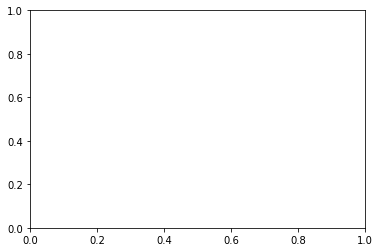

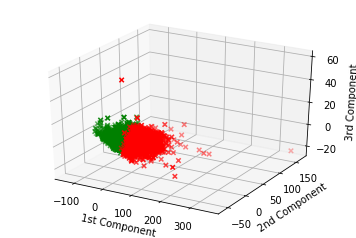

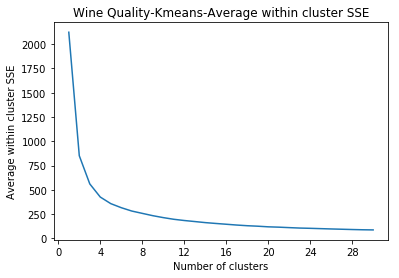

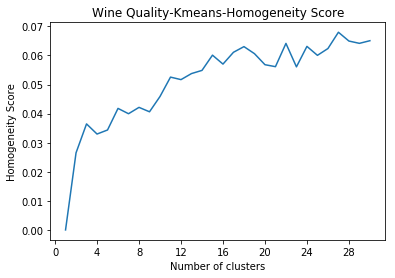

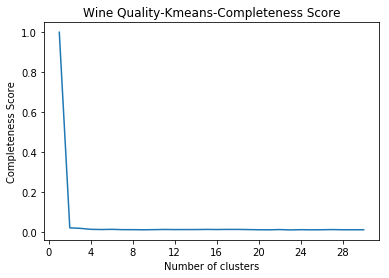

In [18]:
tester = KMeansTestCluster(X, y, clusters=range(1,31), plot=True, targetcluster=2, stats=True)
tester.run()